    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [ ]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [ ]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
k & sigma\\ \hline
k & b & sigma\\ \hline
b & V0 & sigma\\ \hline
V0\\ \hline
0.576 & 0.018 & 0.535 & 0.007 & 0.93 & 0.03\\ \hline
0.565 & 0.032 & 0.621 & 0.006 & 1.10 & 0.06\\ \hline
0.586 & 0.035 & 0.583 & 0.007 & 0.99 & 0.06\\ \hline
0.618 & 0.023 & 0.562 & 0.004 & 0.91 & 0.03\\ \hline
0.654 & 0.005 & 0.512 & 0.001 & 0.78 & 0.01\\ \hline
0.625 & 0.017 & 0.476 & 0.002 & 0.76 & 0.02\\ \hline
0.566 & 0.011 & 0.408 & 0.001 & 0.72 & 0.01
\\ \hline



    Теперь основная часть:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sp_opt

In [ ]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)

    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x

    sigma_k = 1 / np.sqrt (len  (x)) * np.sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * np.sqrt (mid_x_pow2 - mid_x ** 2)

    return MNK_info (k, b, sigma_k, sigma_b)

Калибровка:

Идеал:

$\lambda(\varphi) = \exp (\sum a_n \varphi^n)$ (мб $+ C$ ещё)

Для этого решаем $A \cdot a = \ln (\lambda)$, где A - матрица Вандермонда, составленная из $\varphi_k$

Но не работает из-за огромность экспоненты.

Поэтому ограничимся n = 1:

$\lambda(\varphi) = a \cdot \exp (b \cdot \varphi) + c$

In [ ]:
calib_lambda = list (map (float, input("Neon lamda: ").split()))
calib_phi    = list (map (float, input("Neon phi: ").split()))

func = lambda x, a, b, c: a * np.exp (b * x / 1000) + c
calib_coefs, corr_matrix = sp_opt.curve_fit (func, calib_phi, calib_lambda)

sigma_calib_coefs = [np.sqrt (corr_matrix[i][i]) for i in range (len (corr_matrix))]
print ("a = ", calib_coefs[0], "\n",
       "b = ", calib_coefs[1], "\n",
       "c = ", calib_coefs[2], "\n\n",
       "sigma_a = ", sigma_calib_coefs[0], "\n",
       "sigma_b = ", sigma_calib_coefs[1], "\n",
       "sigma_c = ", sigma_calib_coefs[2], "\n\n", sep = '')

sigma_lambda = lambda x: np.exp (calib_coefs[1] * x / 1000) * sigma_calib_coefs[0] + \
        calib_coefs[0] * np.exp (calib_coefs[1] * x / 1000) * sigma_calib_coefs[1] * x / 1000 + sigma_calib_coefs[2]


Neon lamda: 7032 6929 6717 6678 6599 6533 6507 6402 6383 6334 6305 6267 6217 6164 6143 6096 6074 6030 5976 5945 5882 5852 5401 5341 5331 
Neon phi: 2600 2568 2498 2486 2458 2434 2422 2384 2376 2356 2344 2328 2306 2286 2274 2254 2244 2224 2200 2184 2152 2138 1880 1840 1832 
a = 201.0933295885277
b = 1.0480399118869375
c = 3959.7748856430376

sigma_a = 6.722075872962684
sigma_b = 0.010406447060854935
sigma_c = 20.986313538576976




In [ ]:
func (float(input("Lamda: ")), *calib_coefs)

Графики

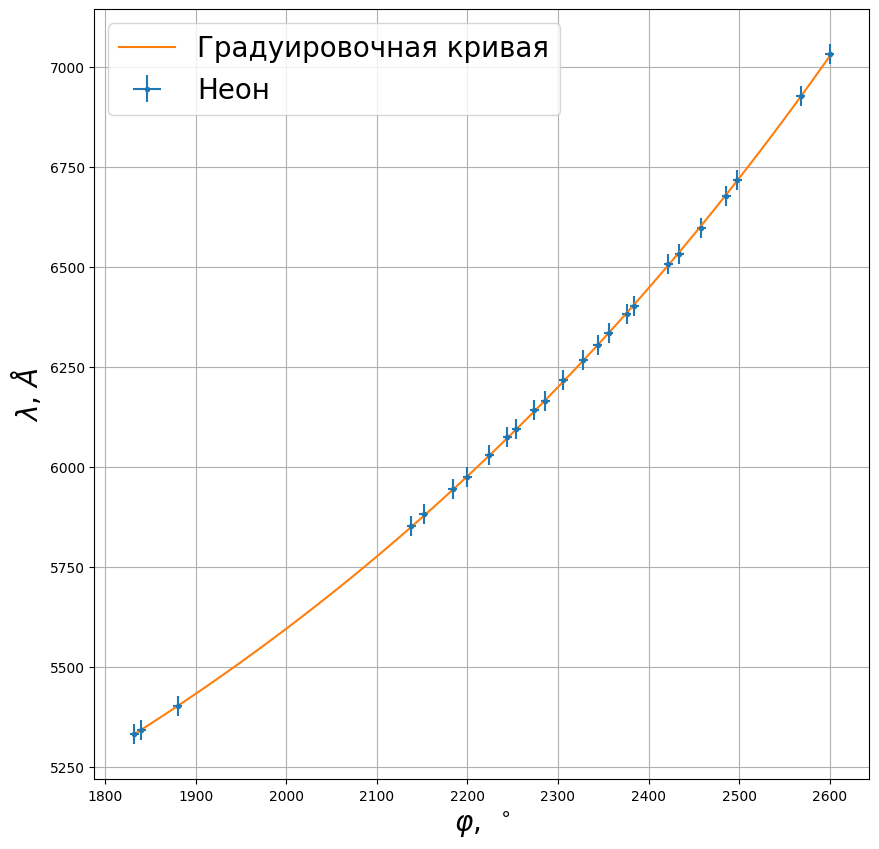

In [ ]:
# plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

# linear = lambda x: MNK_info_curr.k * x + MNK_info_curr.b

ax.errorbar(calib_phi, calib_lambda, xerr=5, yerr=25, fmt='.', label="Неон")

calib_exp_x = np.linspace (min (calib_phi), max (calib_phi), 100)
calib_exp_y = func (calib_exp_x, *calib_coefs)
ax.plot (calib_exp_x, calib_exp_y, label = "Градуировочная кривая")

ax.set_xlabel ('$\\varphi, ~^\circ$', fontsize = 20)
ax.set_ylabel ('$\\lambda$, $\\AA$',  fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig("Picturies/calib.pdf")

In [ ]:
I = np.array (list (map (float, input("I: ").split()))) + 0.04
V = np.array (list (map (float, input("V: ").split())))

sqrt_I = np.sqrt (I)

sorting_arr = zip (sqrt_I, V)
sorting_arr = sorted (sorting_arr, key = lambda x: x[1])
sqrt_I, V = zip (*sorting_arr)

I: 0.282 0.336 0.381 0.415 0.44 0.458 0.475 0.488 0.498 0.507 0.514 0.521 0.528 0.533 0.538 0.544 0.548 0.552 0.556 0.56 0.563 0.566 0.57 0.578 0.585 0.591 0.597 0.602 0.606 0.61 0.618 0.625 0.631 0.637 0.641 0.644 0.128 0.037 -0.02 -0.036 -0.04 -0.04 -0.04 0.224 0.104 0.013 -0.023 
V: 0.005 0.102 0.198 0.3 0.401 0.499 0.598 0.699 0.802 0.905 1 1.101 1.198 1.302 1.399 1.504 1.608 1.705 1.805 1.907 2 2.101 2.247 2.502 2.751 3 3.249 3.509 3.749 4.003 4.502 4.994 5.5 6.006 6.511 6.775 -0.203 -0.405 -0.6 -0.808 -0.994 -1.204 -1.406 -0.1 -0.294 -0.506 -0.695 


In [ ]:
n_start = 3
n_end   = 15

mnk = MNK (V[n_start:n_end], sqrt_I[n_start:n_end])
mnk.Print()

	k = 0.5967318341514579
	b = 0.5369761970233735
	sigma_k = 0.01912977551422298
	sigma_b = 0.006627266320118969


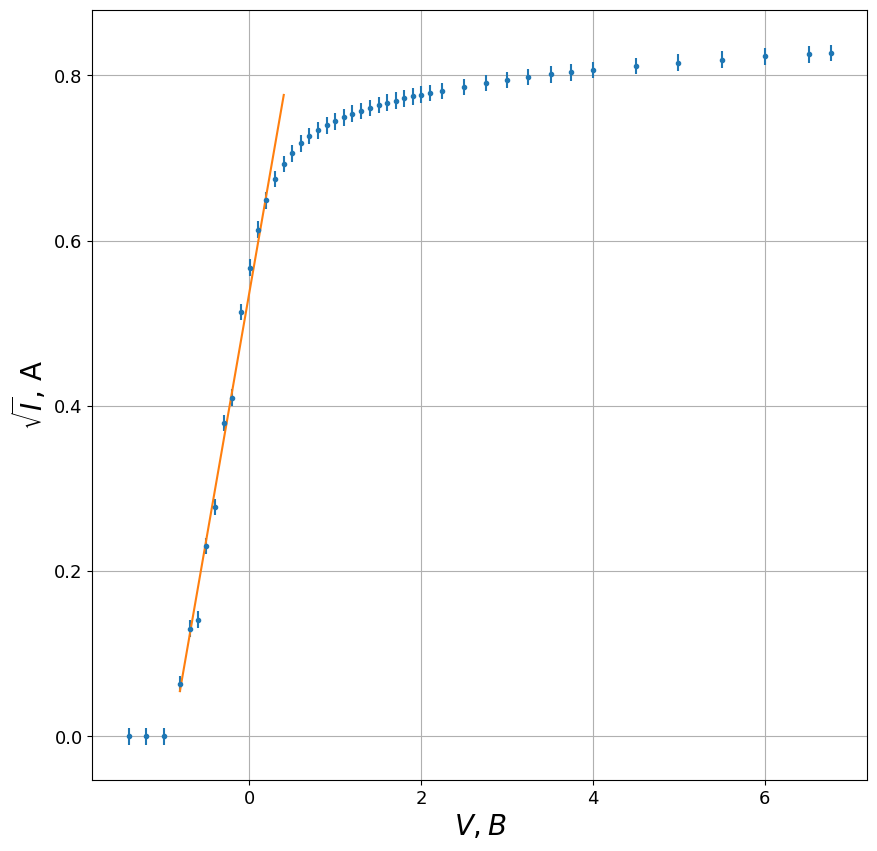

In [ ]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.errorbar(V, sqrt_I, xerr=0.01, yerr=0.01 ,fmt='.')

linear = lambda x: mnk.k * x + mnk.b
ax.plot ([V[n_start], V[n_end]], [linear (V[n_start]), linear (V[n_end])])

ax.set_ylabel ('$\\sqrt{I}$, А', fontsize = 20)
ax.set_xlabel ('$V, В$', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/1880.pdf")

In [ ]:
V0 = np.array (list (map (float, input("V: ").split())))
w  = np.array (list (map (float, input("w: ").split())))

sorting_arr = zip (w, V0)
sorting_arr = sorted (sorting_arr, key = lambda x: x[0])
w, V0 = zip (*sorting_arr)

mnk = MNK (w[0:-1], V0[0:-1])
mnk.Print()

	k = 6.15356197782395e-16
	b = -0.9621202116734268
	sigma_k = 4.436401186969062e-17
	sigma_b = 0.009671029539994316


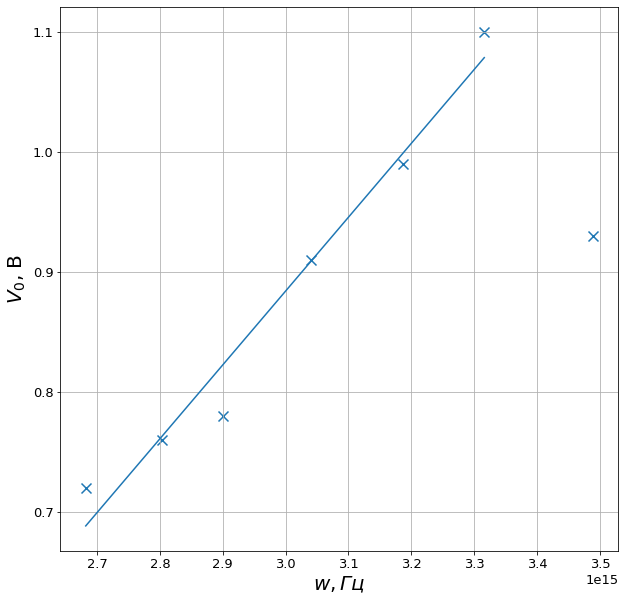

In [ ]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (w, V0, marker = 'x', s=100)

linear = lambda x: mnk.k * x + mnk.b
ax.plot ([w[0], w[-2]], [linear (w[0]), linear (w[-2])])

ax.set_ylabel ('$V_0$, В', fontsize = 20)
ax.set_xlabel ('$w, Гц$', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/V0.pdf")